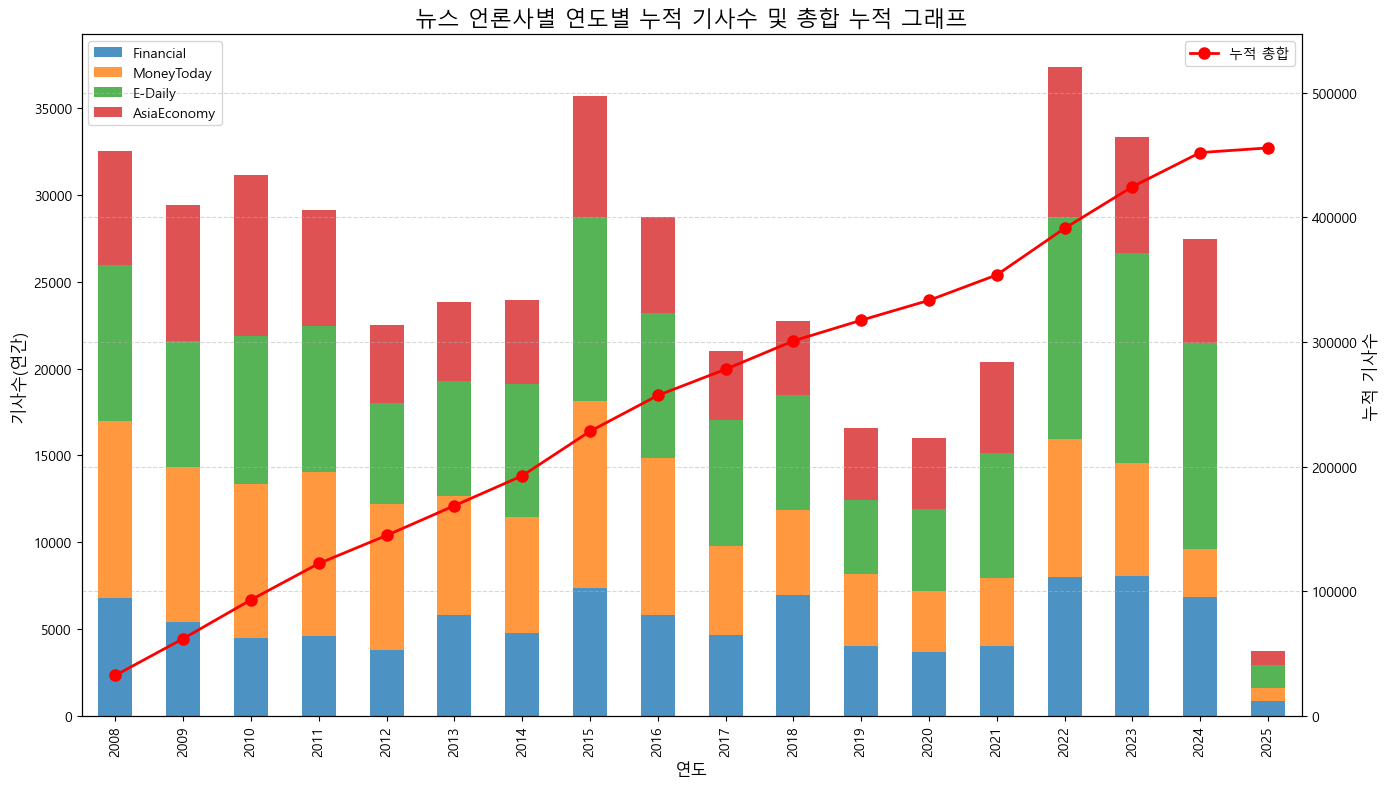

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = r"C:\Users\likel\Desktop\연도별기사갯수.csv"
df = pd.read_csv(file_path)

# 'Year' 컬럼을 문자열로 변환
df['year'] = df['Year'].astype(str)

# 언론사 컬럼을 데이터에 맞게 수정
news_df = df[['year', 'Financial', 'MoneyToday', 'E-Daily', 'AsiaEconomy']].copy()

# 언론사별 연도별 합계 피벗테이블 생성
pivot = news_df.set_index('year')

# 연도별 합계 계산 (4개사 합계)
pivot['total'] = pivot.sum(axis=1)

# 누적 합계 계산 (꺾은선 그래프 용)
pivot['cum_total'] = pivot['total'].cumsum()

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 8))

# 언론사별 누적 막대그래프
pivot[['Financial', 'MoneyToday', 'E-Daily', 'AsiaEconomy']].plot(kind='bar', stacked=True, ax=ax1, alpha=0.8)

# 누적 총합 꺾은선 그래프 추가
ax2 = ax1.twinx()
ax2.plot(pivot.index, pivot['cum_total'], color='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='누적 합계')

# 꺾은선이 확실히 위로 가도록 y축 설정
ax2.set_ylim(0, pivot['cum_total'].max() * 1.2)

# 제목 및 레이블 설정
ax1.set_title('뉴스 언론사별 연도별 누적 기사수 및 총합 누적 그래프', fontsize=16)
ax1.set_xlabel('연도', fontsize=12)
ax1.set_ylabel('기사수(연간)', fontsize=12)
ax2.set_ylabel('누적 기사수', fontsize=12)

# 범례 설정
ax1.legend(loc='upper left')
ax2.legend(['누적 총합'], loc='upper right')

# 시각화 설정
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
